# News Article Text Scrapping and Applying Machine Learning Algorithms 

## Data Science using the Machine Learning Classifiers 

### finding the Accuracy of the Supervised Learning Algorithms and discussing the report on  the same

## Part 1. Data Collection 

### Tasks :

1) To collect the Labelled News Corpus by identifying the URLs and its respective category labels by using the below link.

http://mlg.ucd.ie/modules/COMP41680/archive/index.html

2) To Retrive the all the web pages and extract the main body text containing the news contents. Store the each category labels for all the news atricles.

In [1]:
import requests
import re

pagelink = requests.get("http://mlg.ucd.ie/modules/COMP41680/archive/index.html")
pagelink


<Response [200]>

In [2]:
from pprint import pprint
import pandas as pd


In [3]:
pagelink.status_code   # Status code is 200 it means the webpage is responsive 

200

In [4]:
from bs4 import BeautifulSoup      # importing the bs4 and
soup = BeautifulSoup(pagelink.content, 'html.parser')  # using the html parser 
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- Note: This data is made only available for educational purposes for use COMP41680 Assignment 2 -->
  <title>
   Online News Archive
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="noindex" name="robots"/>
  <meta content="news,articles,news" name="keywords">
   <link href="http://www.insight-centre.org/sites/all/themes/bootstrap_insight/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
   <meta content="Breaking News | International Headlines" property="og:title"/>
   <meta content="News Archive" property="og:site_name"/>
   <meta content="Latest news and more from the definitive brand of quality news." property="og:description"/>
   <link href="css/bootstrap.min.css" rel="stylesheet"/>
   <script src="js/bootstrap.min.js">
   </script>
   <style>
    .main{ padding: 0; text-align: center;}
	  		.footer{ padding: 6px;text-align: center; margin-t

## Extracting the news content for one month 

Since the URLs are nested and its been quite complex to extract the news contents and its respective labels, so here I have given a try for the january month news articles.

<br>
Here I have created the dataframe with cloumn News and Label so that I can store the content and its label sequentially or to maintaon the mapping between the news article and its label. 

In [5]:
url = "http://mlg.ucd.ie/modules/COMP41680/archive/month-jan-2017.html"
pagelink = requests.get(url)
soup = BeautifulSoup(pagelink.text, 'lxml')
table = soup.find('table')
df = pd.DataFrame(columns=["News","Label"])     # creating the dataframe 

root_url = "http://mlg.ucd.ie/modules/COMP41680/archive/"
i=0
for tr in table.find_all('tr'):       # using for loop in all tr tag    
    
    data = tr.find("td").text      # geting the td tag from table to get label
    #print(data)
    #label = tr.find(class_='category')
    #print(h)
    if tr.a:
        html = requests.get(root_url + tr.a['href'])   # concatenating with the base url to go to article.html link
        article_soup = BeautifulSoup(html.text, 'lxml')
        #print(article_soup.get_text())
        #print(article_soup.find(class_='main').get_text())
        text = ' '.join([str(para.string) for para in article_soup.find_all('p')])  # since the news content is in p tag
        df.loc[i] = (text,data)                                                     # so used for loop and got main text
        i+=1

df.head(10)   # for sample first few news with its label 


,News,Label
0,None The sporting industry has come a long way...,technology
1,Asian quake hits European shares None Shares i...,business
2,None BT is offering customers free internet te...,technology
3,Barclays shares up on merger talk None Shares ...,business
4,None None None None None None Comments are clo...,sport
5,Bellamy under new fire None Newcastle boss Gra...,sport
6,Benitez 'to launch Morientes bid' None Liverpo...,sport
7,None Liverpool manager Rafael Benitez admitted...,sport
8,None The arrival of new titles in the popular ...,technology
9,None Visitors to the British Library will be a...,technology


## Now Extracting the News contents for whole year data 
<br> 
__Here I have extracted the news content its respective label for the whole year. Since the links for the every month
is stored in the 'ul' tag so, I find the ul tag first and then its class 'a' that is anchor tag.  The syntax which I have used for getting the news content for month is used but I have made changes accordingly.__ 

In [6]:
url = "http://mlg.ucd.ie/modules/COMP41680/archive/"     # Base url from which we can redirect to other links
pagelink = requests.get(url)
soup = BeautifulSoup(pagelink.text, 'lxml')

list_item = soup.find('ul')        # getting the ul tag 

dict = {}
l = []
i=0
for item in list_item.find_all('a'):    # finding the anchor tag 
    
    d = item.attrs                      # getting the attribute of the a tag
    for k,v in d.items():
        #print(v)
        l.append(url + v)               # appending the article link 
        #print(url + tr.a['href'])
        #print(html)
        html = requests.get(url + v)    # sending again the new request with new url that is base + article
        new_url = url + v         
        pagelink = requests.get(new_url)
        soup = BeautifulSoup(pagelink.text, 'lxml')
        tables = soup.find('table')      # finding the table tag tag to get tr and td
        for tr in tables.find_all('tr'):
            
            heading = tr.find("td").text      # heading has labels stored for every article 
            if tr.a:
                next_url = requests.get(url + tr.a['href'])
                article_soup = BeautifulSoup(next_url.text, 'lxml')
                text = ' '.join([str(para.string) for para in article_soup.find_all('p')])
                #print(text)
                df.loc[i] = (text,heading)
                i+=1
    
df.head(n=20)

,News,Label
0,None The sporting industry has come a long way...,technology
1,Asian quake hits European shares None Shares i...,business
2,None BT is offering customers free internet te...,technology
3,Barclays shares up on merger talk None Shares ...,business
4,None None None None None None Comments are clo...,sport
5,Bellamy under new fire None Newcastle boss Gra...,sport
6,Benitez 'to launch Morientes bid' None Liverpo...,sport
7,None Liverpool manager Rafael Benitez admitted...,sport
8,None The arrival of new titles in the popular ...,technology
9,None Visitors to the British Library will be a...,technology


In [7]:
len(df)  # to check we have collected the total number of news from all the months 

1408

**Once I have the data in pandas dataframe we can write them into a CSV file here I have stored the News articles in newsfile.csv and its category in labelfile.csv**

In [8]:
df.to_csv('newsfile.csv', index=False, header=False, columns=['News'])
df.to_csv('labelfile.csv', index=False, header=False, columns=['Label'])

** Now I  have the news atricles with its content in seperate file and its lable in other file, now getting the Newsfile to 
do some text preprocessing on the same. **

In [10]:
file_in = open("newsfile.csv","r")
raw_docs = file_in.readlines()
file_in.close()
print("Read %d raw text documents from the file" % len(raw_docs))

Read 1408 raw text documents from the file


# Part 2. Text Preprocessing 

## Tokenizing the text

When we have the raw document we can tokenize the document, since the raw data is not numeric its in textual format so
here we have to tokenize the documents to analyse the text. 
<br>
We can use the built-in scikit-learn tokenizer to split the documents into tokens, lets work with one document for smaple and then apply on whole. 

In [18]:
doc1 = raw_docs[0]
print(doc1[0:500])   # print the few 500 lines from docs

"None The sporting industry has come a long way since the â??60s. It has carved out for itself a niche with its roots so deep that I cannot fathom the sports industry showing any sign of decline any time soon - or later. None The reason can be found in this seemingly subtle difference - other industries have customers; the sporting industry has fans. Vivek RanadivÃ©, leader of the ownership group of the NBAâ??s Sacramento Kings, explained it beautifully, â??Fans will paint their face purple, fan


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
tokenize = CountVectorizer().build_tokenizer()
# First convert to lowercase, then tokenize
tokens1 = tokenize(doc1.lower())
print(tokens1)

['none', 'the', 'sporting', 'industry', 'has', 'come', 'long', 'way', 'since', 'the', '60s', 'it', 'has', 'carved', 'out', 'for', 'itself', 'niche', 'with', 'its', 'roots', 'so', 'deep', 'that', 'cannot', 'fathom', 'the', 'sports', 'industry', 'showing', 'any', 'sign', 'of', 'decline', 'any', 'time', 'soon', 'or', 'later', 'none', 'the', 'reason', 'can', 'be', 'found', 'in', 'this', 'seemingly', 'subtle', 'difference', 'other', 'industries', 'have', 'customers', 'the', 'sporting', 'industry', 'has', 'fans', 'vivek', 'ranadivã', 'leader', 'of', 'the', 'ownership', 'group', 'of', 'the', 'nbaâ', 'sacramento', 'kings', 'explained', 'it', 'beautifully', 'fans', 'will', 'paint', 'their', 'face', 'purple', 'fans', 'will', 'evangelize', 'every', 'other', 'ceo', 'in', 'every', 'business', 'is', 'dying', 'to', 'be', 'in', 'our', 'position', 'theyâ', 're', 'dying', 'to', 'have', 'fans', 'none', 'while', 'fan', 'passion', 'alone', 'could', 'almost', 'certainly', 'keep', 'the', 'industry', 'going',

## Removing the Stopwords 

Stopwords are those words which are conjective, connecting, joining, pronoun etc. these words doesnt make any sense 
while in the process of text processing so we have to remove them from the corpus so that the analysed data gives more 
correct values.
<br>
To this task the sklearn has the built-in package called featureExtraction using which we can remove the stop words from the  corpus.

In [20]:
from sklearn.feature_extraction import text
stopwords = text.ENGLISH_STOP_WORDS
filtered_tokens1 = []
for token in tokens1:
    if not token in stopwords:
        filtered_tokens1.append(token)
print(filtered_tokens1)

['sporting', 'industry', 'come', 'long', 'way', '60s', 'carved', 'niche', 'roots', 'deep', 'fathom', 'sports', 'industry', 'showing', 'sign', 'decline', 'time', 'soon', 'later', 'reason', 'seemingly', 'subtle', 'difference', 'industries', 'customers', 'sporting', 'industry', 'fans', 'vivek', 'ranadivã', 'leader', 'ownership', 'group', 'nbaâ', 'sacramento', 'kings', 'explained', 'beautifully', 'fans', 'paint', 'face', 'purple', 'fans', 'evangelize', 'ceo', 'business', 'dying', 'position', 'theyâ', 'dying', 'fans', 'fan', 'passion', 'certainly', 'industry', 'going', 'leagues', 'sporting', 'franchises', 'decided', 'rest', 'laurels', 'years', 'seen', 'steady', 'introduction', 'technology', 'world', 'sports', 'amplifying', 'fansâ', 'appreciation', 'games', 'enhancing', 'athletesâ', 'public', 'profiles', 'informing', 'training', 'methods', 'influencing', 'contests', 'waged', 'digital', 'technology', 'particular', 'helped', 'create', 'alternative', 'source', 'revenue', 'games', 'corporate', '

** Since we have removed stopwords and applied tokenization on one document we have process these on all the news documnets 
we can do this by using below code snippet**

In [22]:
all_filtered_tokens = []
for doc in raw_docs:
    # tokenize the next document
    tokens = tokenize(doc.lower())
    # remove the stopwords
    filtered_tokens = []
    for token in tokens:
        if not token in stopwords:
            filtered_tokens.append(token)  
    # add to the overall list
    all_filtered_tokens.append( filtered_tokens )
print("Total %d filtered tokens lists has been created" % len(all_filtered_tokens) )

Total 1408 filtered tokens lists has been created


## Counting the Tokens in the corpus

***Sicne we have calculated the token lists above now to calculate the term frequency of each word***

In [23]:
counts = {}
# process filtered tokens for each document
for doc_tokens in all_filtered_tokens:
    for token in doc_tokens:
        
        if token in counts:
            counts[token] += 1  #incrementing the token count 
        
        else:
            counts[token] = 1
print("Found %d unique terms in this corpus" % len(counts))

Found 21938 unique terms in this corpus


**we can find the highest count in the dictionary of a particular word from the corpus using the operator library lets give a try for first 20 words which havs highest count in the whole document corpus**

In [35]:
import operator
sorted_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
for i in range(20):
    term = sorted_counts[i][0]
    count = sorted_counts[i][1]
    print( "%s (count=%d)" % ( term, count )  )

said (count=3881)
year (count=1428)
article (count=1365)
people (count=1170)
new (count=1124)
mr (count=1083)
world (count=870)
time (count=834)
search (count=825)
closed (count=794)
comments (count=787)
return (count=759)
results (count=738)
game (count=722)
news (count=719)
online (count=685)
market (count=625)
just (count=610)
company (count=590)
like (count=584)


## Bag-of-Words Representation

In the BOW model each document in the corpus is represented as vector in the m dimensional coordinate space here m is the 
unique word from corpus, and this set of terms is called corpus vocabulary. 
<br>
Since they are represented as term vector so the original term positioning is lost in this model we can make the full document term matrix using these vectors. This process also build the vocabulary for the corpus in the form of list and dict

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(raw_docs)
print(bow.shape)

terms = vectorizer.get_feature_names()
vocab = vectorizer.vocabulary_
print("Vocabulary has %d distinct terms" % len(terms))

(1408, 22230)
Vocabulary has 22230 distinct terms


In [33]:
print(terms[1500:1600])  # some sample terms from the vocabulary 

['advantage', 'advantages', 'advent', 'adventure', 'adventuring', 'adventurous', 'adverse', 'adversity', 'advert', 'advertise', 'advertised', 'advertisements', 'advertiser', 'advertisers', 'advertising', 'adverts', 'advice', 'advise', 'advised', 'adviser', 'advisers', 'advises', 'advising', 'advisor', 'advisors', 'advisory', 'advocate', 'advocated', 'advocates', 'advsr', 'adware', 'ae', 'aefa', 'aeg', 'aer', 'aero', 'aerodynamic', 'aeronautics', 'aerospace', 'aerow', 'aesthetic', 'aesthetically', 'aesthetics', 'affable', 'affair', 'affairs', 'affect', 'affected', 'affecting', 'affection', 'affects', 'afficiandos', 'affiliate', 'affiliated', 'afflict', 'afflicted', 'afflicting', 'affluent', 'afford', 'affordability', 'affordable', 'afforded', 'afful', 'afghanistan', 'afield', 'afoot', 'afp', 'afraid', 'africa', 'african', 'africans', 'after', 'aftermath', 'afternoon', 'afterwards', 'aftewards', 'ag', 'again', 'against', 'agassi', 'age', 'aged', 'ageing', 'agen', 'agence', 'agencies', 'a

#### Checking the given word is removed from the vocabulary and that is and stopword 

In [37]:
vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(raw_docs)
                                        # Are standard stopwords gone?
"are" in vectorizer.vocabulary_

False

### Custom Tokenizer function 

Here I have written the custom function called stem_tokenizer which can do the stemming of the text as well as tokenize them. It is advisable that to do tokenization first than the stemming on the corpus.
since the nltk has the inbuilt function called countVectorizer, using which we can easly apply the stemming and tokenization  on the corpus.

In [44]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import nltk
# define the function
def stem_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # then use NLTK to perform stemming on each token
    stemmer = PorterStemmer()
    stems = []
    for token in tokens:
        stems.append( stemmer.stem(token) )
    return stems

In [45]:
vectorizer = CountVectorizer(tokenizer=stem_tokenizer)
X = vectorizer.fit_transform(raw_docs)
# display some sample terms
terms = vectorizer.get_feature_names()
print(terms[200:220])

['159', '15bn', '15m', '15mb', '15mbp', '15th', '16', '160', '160bn', '160gb', '160m', '162', '162bn', '163', '164', '1650', '165bn', '166', '166bn', '167']


### Custom Lemmatisation function 

Here we can create the tokens and lemmatize the corpus as well and which gives the lematised tokens since, it is advisable to opt for the lemmatisation over the stemming as the lemmatisation gives the word to its original form so here I have used the lemmatisation over stemming  

In [46]:
# define the function
def lemma_tokenizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens = standard_tokenizer(text)
    # then use NLTK to perform lemmatisation on each token
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemma_tokens = []
    for token in tokens:
        lemma_tokens.append( lemmatizer.lemmatize(token) )
    return lemma_tokens

### Custom function for all the Text preprocessing 

Sine we can pass all the configuration to the CountVectorizer inbuilt function so the we can text preprocess at the same time. Here I have passed the all stemming, removing stopwords and removing less frequency words from the corpus and lemmatized the same.

In [54]:
import re
re.sub(r"[0-9a-z]","","raw_docs")         # regex for removing the numbers 
vectorizer = CountVectorizer(stop_words="english",min_df = 3,tokenizer=lemma_tokenizer) #all the text processing conditions 
X = vectorizer.fit_transform(raw_docs)                                                  #together so that we can have clean
# display some sample terms                                                             # data sets or tokens 
print(list(vectorizer.vocabulary_.keys())[0:35])

['sporting', 'industry', 'ha', 'come', 'long', 'way', '60', 'niche', 'root', 'deep', 'sport', 'showing', 'sign', 'decline', 'time', 'soon', 'later', 'reason', 'seemingly', 'difference', 'customer', 'fan', 'leader', 'ownership', 'group', 'king', 'explained', 'paint', 'face', 'ceo', 'business', 'position', 'theyâ', 'passion', 'certainly']


# Part 3. Calculating the Elements for Classification 

## Term Weighting 

Since the most normal way to calculate the weighting of the terms is to calculate the term document matrix 
<br>
we can do this by inbuilt function from sklearn TfidfVectorizer(). 

In [155]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words="english",min_df = 5)
X = vectorizer.fit_transform(raw_docs)
# display some sample weighted values
print(X[0])
X.shape
X.dtype
X.data

  (0, 5472)	0.342198418857
  (0, 3035)	0.27756354956
  (0, 1262)	0.0642449722743
  (0, 3520)	0.0630507021512
  (0, 6308)	0.0534852569449
  (0, 3934)	0.131609410588
  (0, 1648)	0.108311016524
  (0, 5473)	0.192502477498
  (0, 5289)	0.0966795717369
  (0, 5300)	0.094224028886
  (0, 1642)	0.099930741194
  (0, 5913)	0.0449017967911
  (0, 5406)	0.0856293877581
  (0, 3366)	0.0780632032134
  (0, 4697)	0.0966795717369
  (0, 1769)	0.1020240471
  (0, 3034)	0.108311016524
  (0, 1569)	0.0810929083695
  (0, 2289)	0.337376311306
  (0, 3391)	0.109048354775
  (0, 4108)	0.109048354775
  (0, 2685)	0.065184232789
  (0, 3305)	0.145239466354
  (0, 2214)	0.103732727141
  (0, 2254)	0.0757318069039
  :	:
  (0, 3136)	0.131609410588
  (0, 5809)	0.127081260139
  (0, 6419)	0.0467017013056
  (0, 2558)	0.130796788852
  (0, 2074)	0.124635018143
  (0, 4567)	0.0798316356417
  (0, 5989)	0.0923645566494
  (0, 3737)	0.126186447179
  (0, 1776)	0.0742486231456
  (0, 4150)	0.0958309124563
  (0, 2799)	0.0848494204853
  (0, 152

array([ 0.34219842,  0.27756355,  0.06424497, ...,  0.09927267,
        0.13738459,  0.1312654 ])

In [156]:
tr_data = X.toarray()   # since the matrix is in sparse  form so converting it to the array so that it can process  
tr_data.shape 

(1408, 6481)

**Getting the Category file from the csv and loading it to the pandas dataframe. since i have stored the file named as "labelfile.csv" and then passing the matrix variable and label to the classifier.**

In [157]:
import numpy as np
trgt_label=[]  
file_labl = open('labelfile.csv', 'r')
for l in file_labl:
    trgt_label.append(l.strip())
#print(extracted_cat)

len(trgt_label)          # list having the category labels

1408

## Document Term Matrix 

The sklearn is very useful in case of the text processing and evaluating the values which are needed for the comparision 
for the various classifiers. Here I have plotted the document term matrix using the panda dataframe where I have plotted the Category labels on the ROWS and List of words on the columns.

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(stop_words="english",tokenizer=lemma_tokenizer)
X = vectorizer1.fit_transform(raw_docs)
doc_trm_matrix = pd.DataFrame(tr_data, index = trgt_label ,columns=vectorizer.get_feature_names())
doc_trm_matrix.head()


,000,000m,01,03,04,05,07,10,100,100m,...,yugansk,yuganskneftegas,yukos,zealand,zero,zidane,zinedine,zombies,zone,zurich
technology,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
business,0.052708,0.0,0.0,0.064893,0.0,0.0,0.062003,0.053594,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057929
technology,0.026979,0.0,0.0,0.000000,0.0,0.0,0.000000,0.027433,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
business,0.032276,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.04498,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
sport,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Classification 

We have the inbuilt function to split the data for training and test, the sklearn provides the function train_test_split function to split the data set provided. Below is the snippet for splitting the data in to appropriate proportion.

In [164]:
from sklearn.model_selection import train_test_split
X_raw, Y_raw = tr_data, trgt_label
data_train, data_test, target_train, target_test = train_test_split(tr_data, trgt_label, test_size=0.2)
print("Training set has %d examples" % data_train.shape[0] )
print("Test set has %d examples" % data_test.shape[0] )


Training set has 1126 examples
Test set has 282 examples


In [259]:
class_names=set(target_test)
print(class_names)            # Making the predictions for classification which is three 
pred_results={}

{'sport', 'technology', 'business'}


## Confusion Matrix & Accuracy

Confusion matrix is used to describe the performance of the classifier to plot the confusion matrix sklearn provides the inbuilt function to plot the confusion matrix here I have plotted the matrix for evry classifier and found out the accuracy for the each classifier.

In [260]:
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
def plot_confusion_matrix(cm, classes,normalize=False, title='Confusion matrix',cmap=plt.cm.BuPu):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [261]:
# All the important imports for the plotting the confusion matrix and calculating the accuracy 

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np

# KNN Classifier 

Here I have used the KNN classifier to train the data using the sklearn inbuilt classifier function. It is the simple and efective classifier, it works on the principle of finding the most similar previous examples for which the decision has already been made. 
Here we call the fit() function to build the model on training data and then we can use the predict() function on new data so that we can analyse the classifier. 


In [262]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(data_train, target_train)   # passing the training data and unseen data to model the classifier
print(KNN_model)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


In [263]:
predicted_knn = KNN_model.predict(data_test) # predicting the model
predicted_knn[0:10]  # printing the predicted label sample 

array(['technology', 'business', 'business', 'sport', 'sport', 'sport',
       'sport', 'sport', 'technology', 'technology'], 
      dtype='<U10')

In [278]:
from sklearn import metrics
knn_acc = metrics.accuracy_score(target_test, predicted_knn)
print("Accuracy of the KNN Classifier is %f" % knn_acc)     # calculating the accuracy normal accuracy

print(" The Classification report is as below:\n")
print(metrics.classification_report(target_test, predicted_knn)) # printing the calssification report 
# calculating the mean accuracy with cross validation fold is 10 
knn_acc_scores =  cross_val_score(KNN_model, tr_data, trgt_label, cv=10, scoring="accuracy")
print("K-Nearest Neighbour: Mean cross-validation accuracy = %.2f" % knn_acc_scores.mean() )

Accuracy of the KNN Classifier is 0.964539
 The Classification report is as below:

             precision    recall  f1-score   support

   business       0.97      0.94      0.95        97
      sport       0.98      0.98      0.98       105
 technology       0.94      0.97      0.96        80

avg / total       0.96      0.96      0.96       282

K-Nearest Neighbour: Mean cross-validation accuracy = 0.95


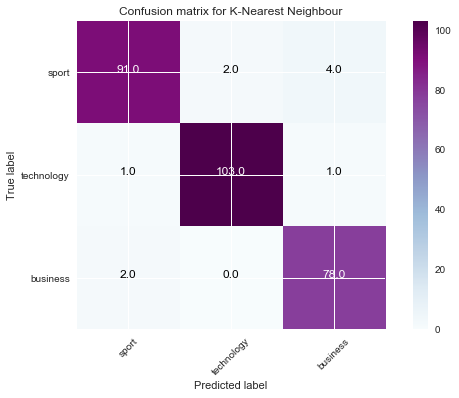

In [275]:
# Printing the Confusion matrix for KNN classifier 
knn_cnfsn_matrix = confusion_matrix(target_test, predicted_knn)
plt.figure()
plot_confusion_matrix(knn_cnfsn_matrix, classes=class_names, title='Confusion matrix for K-Nearest Neighbour')
plt.show()



# Logistic Regression Classifier

This is an appropriate regression analysis is conducted when you have the depenedent variable, this is also an predective analysis classifier. Since the Logistic Regression used to represent the relationship between one dependent variable(binary) and nominal variable.  


In [276]:
# Training the model and passing training data.
from sklearn.linear_model import LogisticRegression
LogR_model = LogisticRegression()
LogR_model.fit(data_train, target_train)
print(LogR_model)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [277]:
predicted_LogR = LogR_model.predict(data_test)
predicted_LogR[0:10]
# testing the trained model to predict the new data

array(['technology', 'business', 'business', 'sport', 'sport', 'sport',
       'sport', 'sport', 'sport', 'technology'], 
      dtype='<U10')

In [279]:
from sklearn import metrics
LogR_acc = metrics.accuracy_score(target_test, predicted_LogR)
print("Accuracy of the Logistic Regression Classifier is %f" % LogR_acc) #calculating the accuracy 

# the calssification report is printed 
print(" The Classification report is as below:\n")
print(metrics.classification_report(target_test, predicted_LogR))

# calculating the accuracy when applying the cross validation with fold=10
logr_acc_scores =  cross_val_score(LogR_model, tr_data, trgt_label, cv=10, scoring="accuracy")
print("Logistic Regression: Mean cross-validation accuracy = %.2f" % logr_acc_scores.mean() )

Accuracy of the Logistic Regression Classifier is 0.978723
 The Classification report is as below:

             precision    recall  f1-score   support

   business       0.97      0.98      0.97        97
      sport       0.98      0.99      0.99       105
 technology       0.99      0.96      0.97        80

avg / total       0.98      0.98      0.98       282

Logistic Regression: Mean cross-validation accuracy = 0.98


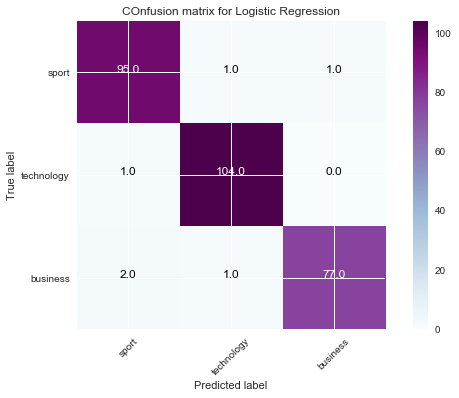

In [280]:
# Printing the confusion matrix for the Logistic regression 
LogR_cnfsn_matrix = confusion_matrix(target_test, predicted_LogR)
plt.figure()
plot_confusion_matrix(LogR_cnfsn_matrix, classes=class_names, title="COnfusion matrix for Logistic Regression")
plt.show()


# Decision Tree Classifier 

Decision Tree classifier is used to predict the class lables by learning the decision rules learned from the training data. The basic idea behind the decision tree is it splits the training data into subsets in which the other examples have the same labels.

Splitting is done using the applied training infrred rules.


In [270]:
from sklearn.tree import DecisionTreeClassifier  # by default it is gini index 
DesT_model = DecisionTreeClassifier()
DesT_model.fit(data_train, target_train)
print(DesT_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [271]:
predicted_DesT = DesT_model.predict(data_test)
predicted_DesT[0:10]        # building the model for decision tree classifier 

array(['technology', 'business', 'business', 'sport', 'sport', 'sport',
       'sport', 'sport', 'sport', 'technology'], 
      dtype='<U10')

In [281]:
DesT_acc = metrics.accuracy_score(target_test, predicted_DesT)   # accuracy of the classifier
print("Accuracy of the Decision Tree Classifier is %f" % DesT_acc)
# Classification report of the classifier 
print(" The Classification report is as below:\n")
print(metrics.classification_report(target_test, predicted_DesT))
# accuracy of decision tree using cross validation process with fold=10
dest_acc_scores =  cross_val_score(DesT_model, tr_data, trgt_label, cv=10, scoring="accuracy")
print("Decision Tree: Mean cross-validation accuracy = %.2f" % dest_acc_scores.mean() )

Accuracy of the Decision Tree Classifier is 0.882979
 The Classification report is as below:

             precision    recall  f1-score   support

   business       0.88      0.84      0.86        97
      sport       0.89      0.95      0.92       105
 technology       0.87      0.85      0.86        80

avg / total       0.88      0.88      0.88       282

Decision Tree: Mean cross-validation accuracy = 0.87


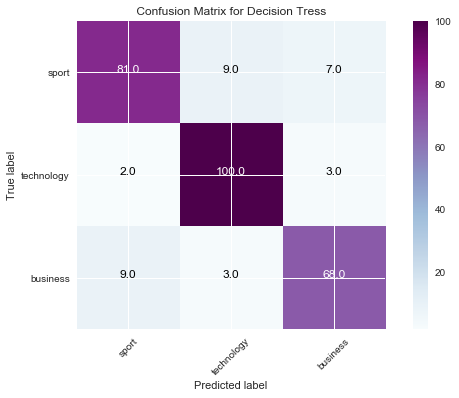

In [273]:
# Confusion matrix 
DesT_cnfsn_matrix = confusion_matrix(target_test, predicted_DesT)
plt.figure()
plot_confusion_matrix(DesT_cnfsn_matrix, classes=class_names, title=" Confusion Matrix for Decision Tress ")
plt.show()

# Classifier comparison

###### As I have used the three classifiers for given data sets, they are K Nearest neighbor, Logistic Regression, Decision Tree classifier. when we calculate their normal accuracy we may have the chances to get some little difference to over come this problem we use the cross validation accuracy value. Here I have used the fold value is 10 for all the three classifiers and calculated the mean accuracy. 

In [352]:
#accu=[(knn_acc_scores.mean()),(logr_acc_scores.mean()),(dest_acc_scores.mean())]
accu = [0.95385890705039633, 0.97797808574404321, 0.86505632665207133]
accu1 = [i * 100 for i in accu]

label = ['KNN','Logistic','Decision']

## Evaluation of classifiers & Conclusion

First of all we have consider every parameter to evaluate the classifier, since in theoretical there is nothing like which classifier is better than others. The performance of the every classifier is depends upon the type of data we have eg. we might have categorical data or nomial data or may be numeric data, so in general case one classifier can perform well on one type of data where as same classifier may give less performance on other type of data. 
<br>

In general when we discuss the performace we consider the predictablity of the classifier, or accuracy of the classifier here From the bar chart it is clear that the Logistic Regression classifier performs well compared to other two.
<br>

The reason behind this is that Logistic Regression Classifer works well woth categorical data which is multicalss catagory, the principle is same as that of binary category labels but key difference is that it considers the one category of the variable as reference category and separate other vaiables. Since its already explained the accuracy and performance is always depends on the type of data and selection of classifiers.

**Conclusion :** All the classifiers are implemented and studied successfully also evaluated their respective accuracy and performance successfully.

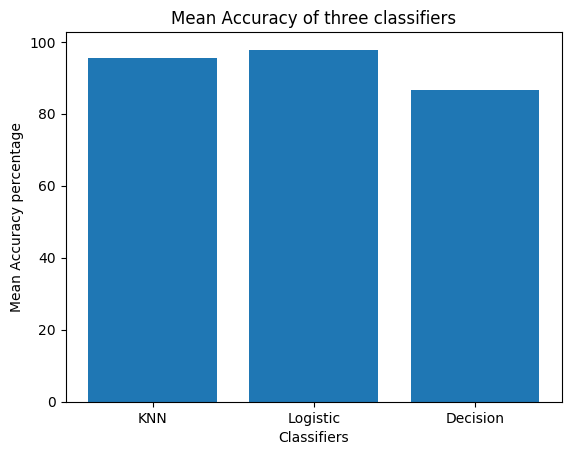

In [354]:
import matplotlib.pyplot as plt
import numpy as np                                                               

index = np.arange(len(label))
plt.bar(index, accu1)
plt.xlabel('Classifiers', fontsize=10)
plt.ylabel('Mean Accuracy percentage', fontsize=10)
plt.xticks(index, label, fontsize=10)
plt.title('Mean Accuracy of three classifiers')
plt.show()

## References:

1. http://scikit-learn.org/stable/modules/feature_extraction.html
2. https://github.com/susanli2016/Text-Mining-with-Python 
3. https://stackoverflow.com/
4. http://pandas.pydata.org/pandas-docs/stable/
5. www.datacamp.com  
6. class Notes
7. Lab Notebooks